# Word Embedding

- Difficulties in one-hot encoding
    - binary and sparse (mostly made of zeros) vectors
    - very high-dimensional


- Word embedding
    - low-dimensional floating-point dense vectors
    - learned from data
    
$\rightarrow$ more information, fewer dimensions

#### Learning Word Embedding with the Embedding layer

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
from keras.layers import Embedding

In [3]:
embedding_layer = Embedding(1000, 64)

cf.) **Embedding**(number of possible tokens, dimensionality of the embeddings)  
= a dictionary that maps integer indices to dense vectors

In [4]:
from keras.datasets import imdb
from keras import preprocessing

In [5]:
max_features = 10000
max_length = 20

In [6]:
(Xtrain, Ytrain), (Xtest, Ytest) = imdb.load_data(num_words = max_features)

print('X sample:\n', Xtrain[0], '\n')
print('Y sample:', Ytrain[0])

Xtrain = preprocessing.sequence.pad_sequences(Xtrain, maxlen = max_length)
Xtest = preprocessing.sequence.pad_sequences(Xtest, maxlen = max_length)

X sample:
 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32] 

Y sample: 1


In [8]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

In [9]:
model = Sequential()

model.add(Embedding(10000, 8, input_length = max_length))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(Xtrain, Ytrain, validation_split = 0.2,
                    epochs = 10, batch_size = 32)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 68us/step - loss: 0.6759 - acc: 0.6050 - val_loss: 0.6398 - val_acc: 0.6814
Epoch 2/10
20000/20000 [==============================] - 1s 53us/step - loss: 0.5657 - acc: 0.7427 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/10
20000/20000 [==============================] - 1s 57us/step - loss: 0.4752 - acc: 0.7808 - val_loss: 0.5113 - val_acc: 0.7384
Epoch 4/10
20000/20000 [==============================] - 1s 59us/step - loss: 0.4263 - acc: 0.8077 - val_loss: 0.5008 - val_acc: 0.7452
Epoch 5/10
20000/20000 [==============================] - 1s 54us/step - loss: 0.3930 - acc: 0.8257 - val_loss: 0.4981 - val_acc: 0.7538
Epoch 6/10
20000/20000 [==============================] - 1s 52us/step - loss: 0.3668 - acc: 0.8395 - val_loss: 0.5014 - val_acc: 0.7530
Epoch 7/10
20000/20000 [==============================] - 1s 54us/step - loss: 0.3435 - acc: 0.8533 - val_loss: 0.5052 - val_acc:

In [11]:
def history_plot(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc)+1)
    
    plt.plot(epochs, acc, 'bo', label = 'Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    
    plt.figure()
    
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    plt.show()

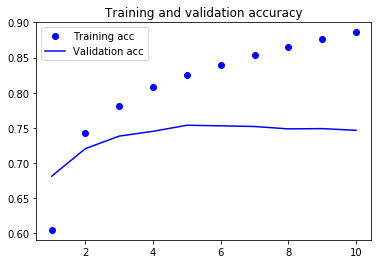

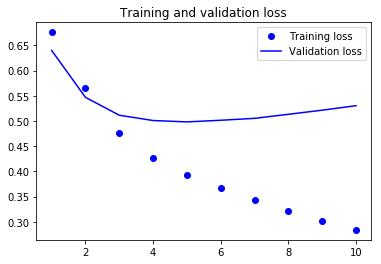

In [12]:
history_plot(history)

### ▶ from raw IMDB text to word embeddings

#### Processing the labels of the raw IMDB data

In [13]:
import os

imdb_dir = '/Users/HK/Desktop/LAB/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

In [14]:
# list
labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        # last four characters
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding = 'UTF-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [15]:
print('Sample text:\n', texts[0],'\n')
print('Label:', labels[0])

Sample text:
 Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly. 

Label: 0


#### Tokenizing the data

In [16]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [17]:
max_length = 100    # cut off reviews after 100 words
n_training = 200
n_validation = 100
max_words = 10000   # consider only the top 10000 words in the dataset

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))

Found 88582 unique tokens.


In [18]:
data = pad_sequences(sequences, maxlen = max_length)
labels = np.asarray(labels)
print('data shape:', data.shape)
print('label shape:', labels.shape)

data shape: (25000, 100)
label shape: (25000,)


cf. **pad_sequences**(sequences, maxlen, dtype = 'int32', padding = 'pre', truncating = 'pre', value = '0.0')

In [19]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices) 

data = data[indices]
labels = labels[indices]

In [20]:
# Train/Validation Split
Xtrain = data[:n_training]
Ytrain = labels[:n_training]
Xval = data[n_training:(n_training + n_validation)]
Yval = labels[n_training:(n_training + n_validation)]

#### Preprocessing the embeddings with the GloVe word embeddings (precomputed)

In [21]:
glove_dir = '/Users/HK/Desktop/LAB/glove.6B'

# dictionary
embedding_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding = 'UTF-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype = 'float32')
    embedding_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embedding_index))

Found 400000 word vectors.


cf.) **dict.items**(): list((value, index)])

In [22]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

#### Modeling with pre-trained word embeddings

In [23]:
# Defining a Model
model1 = Sequential()
model1.add(Embedding(max_words, embedding_dim, input_length = max_length))
model1.add(Flatten())
model1.add(Dense(32, activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Loading embeddings in the model and Freezing the embedding layer
model1.layers[0].set_weights([embedding_matrix])
model1.layers[0].trainable = False

In [25]:
# Compile
model1.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = ['acc'])

# Train
history1 = model1.fit(Xtrain, Ytrain, validation_data = (Xval, Yval),
                      epochs = 10, batch_size = 32)
model1.save_weights('pre-trained-glove-model.h5')

Train on 200 samples, validate on 100 samples
Epoch 1/10
200/200 [==============================] - 0s 2ms/step - loss: 1.6337 - acc: 0.5250 - val_loss: 0.7179 - val_acc: 0.5000
Epoch 2/10
200/200 [==============================] - 0s 347us/step - loss: 0.7565 - acc: 0.5800 - val_loss: 0.6904 - val_acc: 0.5300
Epoch 3/10
200/200 [==============================] - 0s 332us/step - loss: 0.5956 - acc: 0.6950 - val_loss: 1.1087 - val_acc: 0.5000
Epoch 4/10
200/200 [==============================] - 0s 308us/step - loss: 0.5335 - acc: 0.7350 - val_loss: 0.7432 - val_acc: 0.5600
Epoch 5/10
200/200 [==============================] - 0s 322us/step - loss: 0.4713 - acc: 0.8100 - val_loss: 0.7381 - val_acc: 0.5000
Epoch 6/10
200/200 [==============================] - 0s 330us/step - loss: 0.1448 - acc: 0.9800 - val_loss: 1.2607 - val_acc: 0.4900
Epoch 7/10
200/200 [==============================] - 0s 330us/step - loss: 0.2545 - acc: 0.8800 - val_loss: 1.2520 - val_acc: 0.4900
Epoch 8/10
200/200

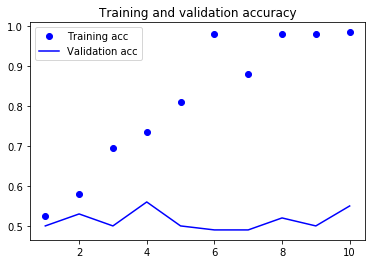

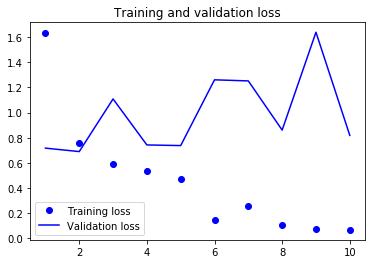

In [26]:
history_plot(history1)

#### Modeling without pretrained word embeddings

In [27]:
model2 = Sequential()
model2.add(Embedding(max_words, embedding_dim, input_length = max_length))
model2.add(Flatten())
model2.add(Dense(32, activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid'))

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [28]:
model2.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics = ['acc'])

history2 = model2.fit(Xtrain, Ytrain, validation_data = (Xval, Yval),
                      epochs = 10, batch_size = 32)

Train on 200 samples, validate on 100 samples
Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6951 - acc: 0.4350 - val_loss: 0.6902 - val_acc: 0.5000
Epoch 2/10
200/200 [==============================] - 0s 766us/step - loss: 0.5028 - acc: 0.9800 - val_loss: 0.7003 - val_acc: 0.4900
Epoch 3/10
200/200 [==============================] - 0s 766us/step - loss: 0.2898 - acc: 0.9850 - val_loss: 0.6998 - val_acc: 0.5000
Epoch 4/10
200/200 [==============================] - 0s 776us/step - loss: 0.1183 - acc: 1.0000 - val_loss: 0.7159 - val_acc: 0.4800
Epoch 5/10
200/200 [==============================] - 0s 786us/step - loss: 0.0524 - acc: 1.0000 - val_loss: 0.7163 - val_acc: 0.5200
Epoch 6/10
200/200 [==============================] - 0s 744us/step - loss: 0.0261 - acc: 1.0000 - val_loss: 0.7267 - val_acc: 0.5000
Epoch 7/10
200/200 [==============================] - 0s 739us/step - loss: 0.0141 - acc: 1.0000 - val_loss: 0.7260 - val_acc: 0.4400
Epoch 8/10
200/200

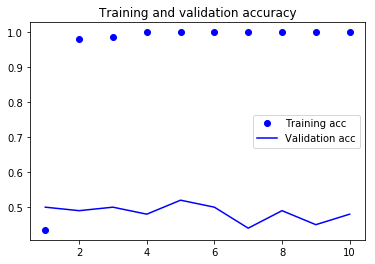

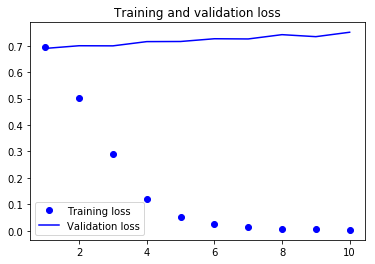

In [29]:
history_plot(history2)

#### Evaluating for test texts

In [30]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding = 'UTF-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [31]:
sequences = tokenizer.texts_to_sequences(texts)
Xtest = pad_sequences(sequences, maxlen = max_length)
Ytest = np.asarray(labels)

In [32]:
model2.load_weights('pre-trained-glove-model.h5')
model2.evaluate(Xtest, Ytest)

25000/25000 [==============================] - 2s 97us/step


[0.7448734481906891, 0.57604]